<a href="https://colab.research.google.com/github/Gunjan712Sehrawat/diabetes-streamlit-app/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Install SMOTE library
!pip install imbalanced-learn

In [2]:
# 2. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import joblib
from google.colab import files

In [3]:
# 3. Upload and Load Dataset
uploaded = files.upload()
df = pd.read_csv('diabetes.csv')

Saving diabetes.csv to diabetes.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Outcome
0    500
1    268
Name: count, dtype: int64


/tmp/ipython-input-4271089667.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='coolwarm')


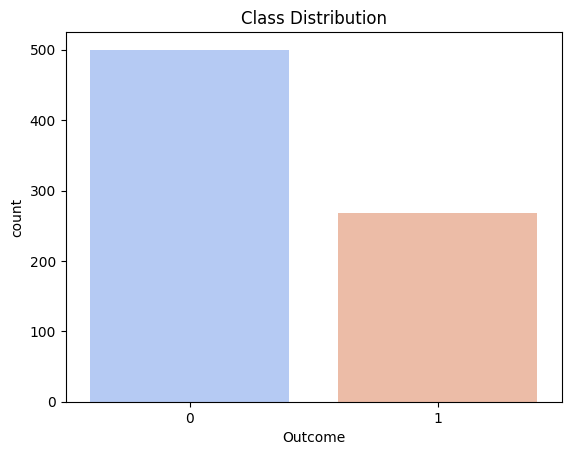

In [4]:
# 4. EDA
print(df.info())
print(df['Outcome'].value_counts())

sns.countplot(x='Outcome', data=df, palette='coolwarm')
plt.title('Class Distribution')
plt.show()

In [5]:
# 5. Features and Target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [6]:
# 6. Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# 7. Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

In [8]:
# 8. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

In [9]:
# 9. Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)

cv_scores = cross_val_score(rf, X_res, y_res, cv=skf, scoring='accuracy')
print(f"Cross-validation Accuracy: {cv_scores.mean():.2f}")

Cross-validation Accuracy: 0.82


In [10]:
# 10. Train Model
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [11]:
# 11. Evaluation
y_pred = rf.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.81

Confusion Matrix:
 [[78 22]
 [16 84]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       100
           1       0.79      0.84      0.82       100

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



ROC-AUC Score: 0.90


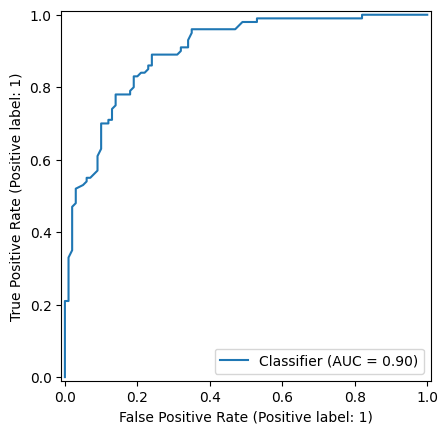

In [12]:
# ROC Curve
y_prob = rf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.show()


In [13]:
# 12. Save Model & Scaler
joblib.dump(rf, 'diabetes_rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
files.download('diabetes_rf_model.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>